# House price prediction model using Linear Regression, Decision Tree and Random Forest Algorithms and finding the best model 

In [533]:
# importing all the important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression    # for linear regression model
from sklearn.model_selection import cross_val_score   # for cross validation
from sklearn.tree import DecisionTreeRegressor       # for decision tree regressor problem



In [3]:
dataset = pd.read_csv(r"C:\Users\Sahito\Downloads\Documents\kc_house_data.csv")


In [4]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# y(target variables 'Price') 

y= dataset.iloc[:, 2]
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [75]:
 
X= dataset.iloc[:, 3:]
X['date']= dataset['date']
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,date
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,7.073270,20141013T000000
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,NaN,7.851661,20141209T000000
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,6.646391,20150225T000000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,7.580700,20141209T000000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,7.426549,20150218T000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,2009,0,98103,47.6993,-122.346,1530,1509,12.793859,7.333023,20140521T000000
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,2014,0,98146,47.5107,-122.362,1830,7200,NaN,7.745003,20150223T000000
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,2009,0,98144,47.5944,-122.299,1020,2007,NaN,6.927558,20140623T000000
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,2004,0,98027,47.5345,-122.069,1410,1287,NaN,7.377759,20150116T000000


# Hypothesis : -

**After reading the dataset it seems that the target variable (price) is dependent on features ('bedrooms', 'bathrooms', 'sqft_living','floors', 'condition', 'grade',  'yr_renovated')**

 # Exploratory Data Analyst :-

In [76]:
dataset.dtypes

id                      int64
date                   object
price                 float64
bedrooms                int64
bathrooms             float64
sqft_living             int64
sqft_lot                int64
floors                float64
waterfront              int64
view                    int64
condition               int64
grade                   int64
sqft_above              int64
sqft_basement           int64
yr_built                int64
yr_renovated            int64
zipcode                 int64
lat                   float64
long                  float64
sqft_living15           int64
sqft_lot15              int64
logged price          float64
logged sqft_living    float64
dtype: object

In [77]:
dataset.isnull().sum()

id                       0
date                     0
price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
view                     0
condition                0
grade                    0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated             0
zipcode                  0
lat                      0
long                     0
sqft_living15            0
sqft_lot15               0
logged price          6484
logged sqft_living       0
dtype: int64

In [78]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,15129.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,13.048634,7.550335
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.527391,0.424807
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,11.225243,5.669881
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,12.682928,7.263330
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,13.017003,7.554859
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,13.377006,7.843849
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,15.856731,9.513404


# => Creating plots for our hypothesis variables :-

**Checking wheteher target variable (price) is dependent on features ('bedrooms', 'bathrooms', 'sqft_living','floors', 'condition', 'grade', 'yr_renovated') or not**


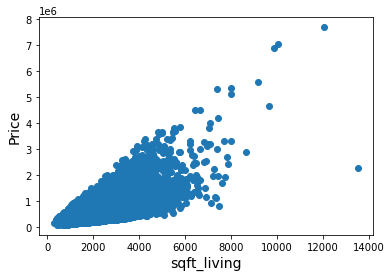

In [79]:


plt.scatter(dataset['sqft_living'], dataset['price'])
plt.xlabel('sqft_living', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

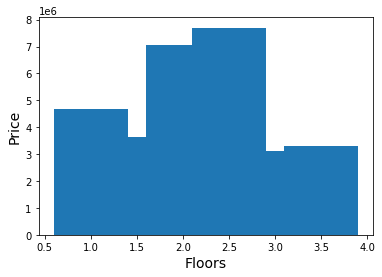

In [80]:

plt.bar(dataset['floors'], dataset['price'])
plt.xlabel('Floors', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

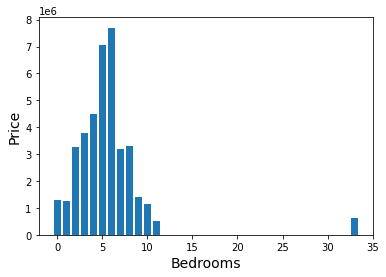

In [81]:
plt.bar(dataset['bedrooms'], dataset['price'])
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

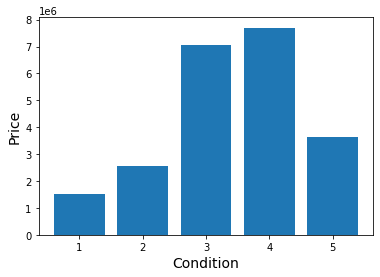

In [82]:
plt.bar(dataset['condition'], dataset['price'])
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

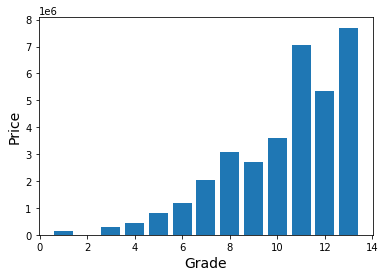

In [83]:
plt.bar(dataset['grade'], dataset['price'])
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

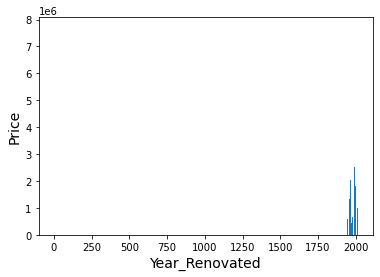

In [84]:
plt.bar(dataset['yr_renovated'], dataset['price'])
plt.xlabel('Year_Renovated', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

# => Creating Correlation Matrix :-


It will give us the better understanding of how each feature is related to target variable

In [85]:
corr_matrix = dataset.corr()
print(corr_matrix)
corr_matrix.style.background_gradient(cmap= 'RdYlGn')

                          id     price  bedrooms  bathrooms  sqft_living  \
id                  1.000000 -0.016762  0.001286   0.005160    -0.012258   
price              -0.016762  1.000000  0.308350   0.525138     0.702035   
bedrooms            0.001286  0.308350  1.000000   0.515884     0.576671   
bathrooms           0.005160  0.525138  0.515884   1.000000     0.754665   
sqft_living        -0.012258  0.702035  0.576671   0.754665     1.000000   
sqft_lot           -0.132109  0.089661  0.031703   0.087740     0.172826   
floors              0.018525  0.256794  0.175429   0.500653     0.353949   
waterfront         -0.002721  0.266369 -0.006582   0.063744     0.103818   
view                0.011592  0.397293  0.079532   0.187737     0.284611   
condition          -0.023783  0.036362  0.028472  -0.124982    -0.058753   
grade               0.008130  0.667434  0.356967   0.664983     0.762704   
sqft_above         -0.010842  0.605567  0.477600   0.685342     0.876597   
sqft_basemen

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,-0.005564,-0.001810
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.894627,0.611704
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.349680,0.620864
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.549958,0.761304
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.694044,0.954322
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.104082,0.148859
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.309431,0.367569
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.183876,0.079306
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.350607,0.246712
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.046330,-0.048143


**By observing the plots and correlation matrix, we found that our initial hypothesis is faulty. From our hypothesis, only 'sqft_living', and 'grade' have significant correlation with the target variable 'price**


**-Other hypothesis variables are useless to define the correlation with the target variable 'price'. S they have no predictive power for the Machine Learning Model and therefore are meaningless**


# ------------------------------------------------------------------

**However other features like 'bathrooms', 'sqft_above''sqft_living15', and'view' are found to have significant correlation with target variable 'price' as clearly seen in correlation matrix, therefore, it is indispensable to include them in training the model as they wiall play  significant role in predicting the value for the targer variable 'price'**

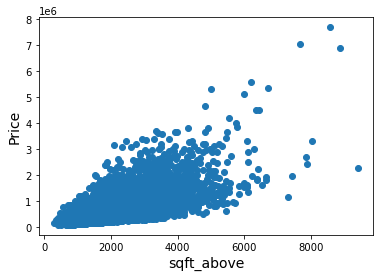

In [86]:
plt.scatter(dataset['sqft_above'], dataset['price'])
plt.xlabel('sqft_above', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

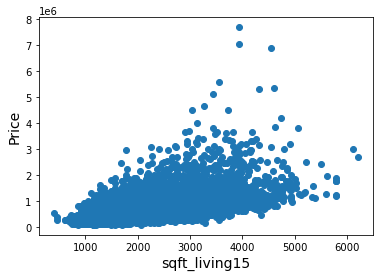

In [87]:
plt.scatter(dataset['sqft_living15'], dataset['price'])
plt.xlabel('sqft_living15', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

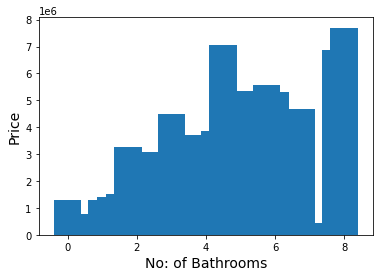

In [88]:
plt.bar(dataset['bathrooms'], dataset['price'])
plt.xlabel('No: of Bathrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

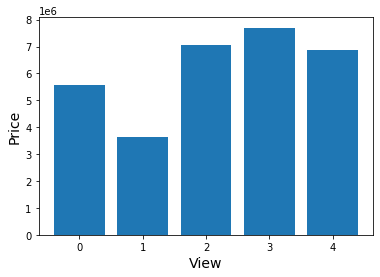

In [89]:
plt.bar(dataset['view'], dataset['price'])
plt.xlabel('View', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

**X (Independent variables, features)**

In [90]:
X


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,date
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,12.309982,7.073270,20141013T000000
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,NaN,7.851661,20141209T000000
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,12.100712,6.646391,20150225T000000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,13.311329,7.580700,20141209T000000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,13.142166,7.426549,20150218T000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,...,2009,0,98103,47.6993,-122.346,1530,1509,12.793859,7.333023,20140521T000000
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,...,2014,0,98146,47.5107,-122.362,1830,7200,NaN,7.745003,20150223T000000
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,...,2009,0,98144,47.5944,-122.299,1020,2007,NaN,6.927558,20140623T000000
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,...,2004,0,98027,47.5345,-122.069,1410,1287,NaN,7.377759,20150116T000000


**y (target variables 'Price')**

In [91]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [451]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [452]:
X_train


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,date
1468,4,1.50,1390,7200,1.0,0,0,3,7,1140,...,1965,0,98133,47.7224,-122.332,1630,7702,12.899220,7.237059,20140529T000000
15590,3,1.50,1450,7316,1.0,0,0,3,7,1450,...,1961,0,98133,47.7725,-122.349,1440,7316,12.971540,7.279319,20150317T000000
18552,5,2.75,2860,5379,2.0,0,0,3,9,2860,...,2005,0,98052,47.7082,-122.104,2980,6018,13.487006,7.958577,20140811T000000
10535,2,1.00,1050,4125,1.0,0,0,4,7,1050,...,1909,0,98144,47.5736,-122.307,1650,4125,12.880292,6.956545,20140926T000000
1069,2,1.00,1240,57000,1.0,0,0,3,7,1240,...,1962,0,98075,47.5970,-122.059,3050,25545,13.132314,7.122867,20140710T000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,5,5.00,3960,94089,2.0,0,0,3,10,3960,...,1998,0,98038,47.3800,-122.011,2240,64468,13.981025,8.283999,20141007T000000
19648,2,2.50,1400,1262,2.0,0,0,3,8,1160,...,2008,0,98106,47.5342,-122.349,1060,1524,12.608199,7.244228,20141118T000000
9845,3,2.25,2360,14950,1.0,0,0,4,9,2360,...,1978,0,98042,47.3856,-122.158,2720,14388,12.973863,7.766417,20140820T000000
10799,4,2.00,2370,76665,2.0,0,0,4,8,2370,...,1978,0,98001,47.2831,-122.279,2110,19334,12.926348,7.770645,20140702T000000


In [453]:
X_train.shape

(15129, 21)

In [454]:
X_test.shape

(6484, 21)

In [455]:
y_train

1468      400000.0
15590     430000.0
18552     720000.0
10535     392500.0
1069      505000.0
           ...    
13123    1180000.0
19648     299000.0
9845      431000.0
10799     411000.0
2732      699900.0
Name: price, Length: 15129, dtype: float64

In [97]:
y_train.shape

(15129,)

In [98]:
y_test.shape

(6484,)

# Model Fitting :--

# Multiple Linear Regression:
 Fitting the *trainset* to **Multiple Linear Regression** and getting the score of the model



**By doing EDA, we have got the variables(significant predictors) having significant correlation with taget variable. Hence, it is time to use these 
predictors to train different linear regression models and evaluate the performance of each model based on R square value and RMSE values, and select the best model**

**To avoid the Problem of Multicollinearity, it is imperative to find out which features (independent variables) have high correlation with each other, and thus, select only one of them to train the model.
From correlation matrix it is clear that features such as 'sqft_living', 'sqft_above', 'sqft_living15' are correlated with each other so can cause problem of multicollinearity. To avoid this problem, it is 
necessary to select only one of them which has high correlation with target variable (in this case 'sqft_living') to train the model**

# Model 1

In [99]:
x_train1 = X_train[['sqft_living', 'grade', 'bathrooms', 'view']]
y_train

model1 = LinearRegression()
score1 = cross_val_score(model1, x_train1, y_train, cv = 10, scoring = 'r2')
score2 = cross_val_score(model1, x_train1, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print('The rms value is', np.abs(score2.mean()))
print('The r square value is', score1.mean())

The rms value is 237461.4526934823
The r square value is 0.5745991261766992


# Model 2
 
**To improve accuracy of the model, it is necessary to add further significant predictors(variables), adding 'bedrooms' and 'waterfront'**


In [100]:
x_train2 = X_train[['sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront']]
y_train  
model2 = LinearRegression()
score1 = cross_val_score(model2, x_train2, y_train, cv = 10, scoring = 'r2')
score2 = cross_val_score(model2, x_train2, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print('The rms value is', np.abs(score2.mean()))
print('The r square value is', score1.mean())

The rms value is 232085.94487873628
The r square value is 0.593502620112951


# Model 3
**TO further improve the accuracy of the model, it is time to add some other significant predictors (features) such as 'lat', and 'yr_built'** 

In [101]:
x_train3 = X_train[['sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront', 'lat', 'yr_built']]
y_train

model3 = LinearRegression()
score1 = cross_val_score(model3, x_train3, y_train, cv = 10, scoring = 'r2')
score2 = cross_val_score(model3, x_train3, y_train, cv = 10, scoring = 'neg_root_mean_squared_error')
print('The rms value is', np.abs(score2.mean()))
print('The r square value is', score1.mean())

The rms value is 201884.13722875388
The r square value is 0.6926383567285447


**Note: - After adding other variables, there is no significant improvement in accuracy observed. There fore, the model 3 is the best model for performance**

# Feature Engineering:--
**To furhter improve the accuracy, it is time to improve some variables by applying transformation on them and to add other variables to see 
whethere they are significant in improving accuracy of the model or not**

# 1. Log Transformation
**-Applying Log Tranformation on some variables ('price', 'sqft_living') having skewed distribution to make their distribution normal and to scale them in logarithm scale.**


**Looking for skewed variables:--**

<Figure size 720x432 with 0 Axes>

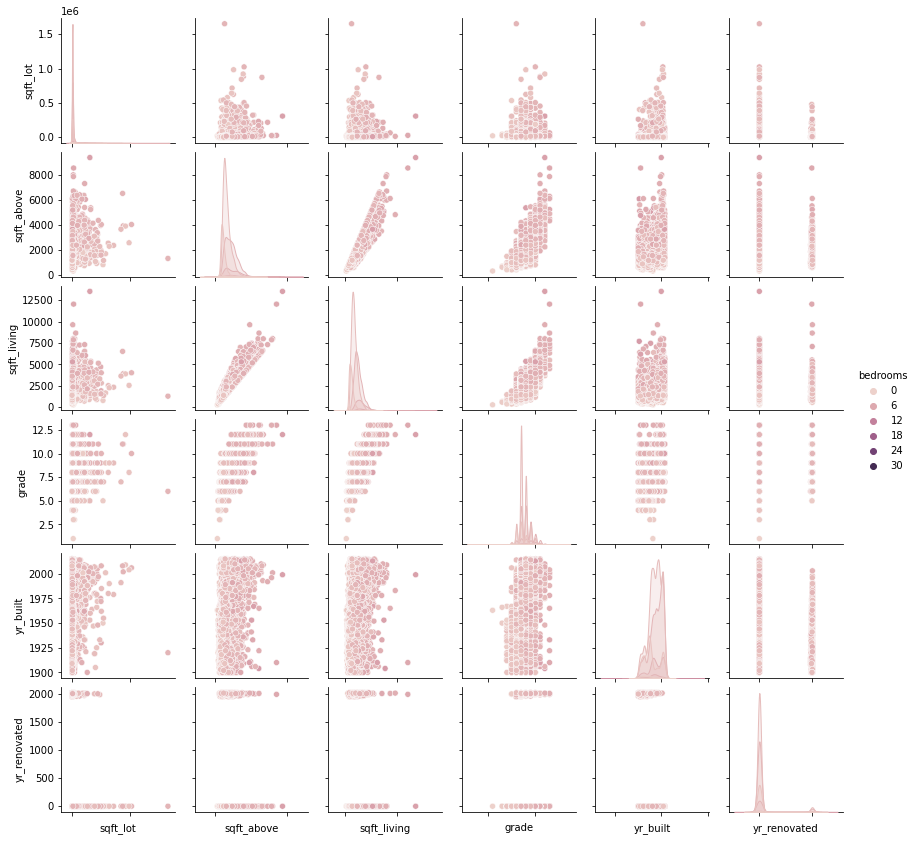

In [456]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(X_train[['sqft_lot','sqft_above','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',height=2)

g.set(xticklabels=[])


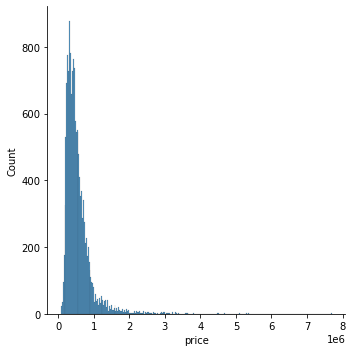

In [457]:
sns.displot(y_train)

**it has been observed that price (y_train) and sqft_living are positively skewed** 

# Log Transformation of price
**Log transformation of positively skewed target variable (price) or y_train**

In [486]:
X_train['logged price']= np.log(y_train)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,date,year of selling,age
1468,4,1.50,1390,7200,1.0,0,0,3,7,1140,...,98133,47.7224,-122.332,1630,7702,12.899220,7.237059,20140529T000000,2014,49.0
15590,3,1.50,1450,7316,1.0,0,0,3,7,1450,...,98133,47.7725,-122.349,1440,7316,12.971540,7.279319,20150317T000000,2015,54.0
18552,5,2.75,2860,5379,2.0,0,0,3,9,2860,...,98052,47.7082,-122.104,2980,6018,13.487006,7.958577,20140811T000000,2014,9.0
10535,2,1.00,1050,4125,1.0,0,0,4,7,1050,...,98144,47.5736,-122.307,1650,4125,12.880292,6.956545,20140926T000000,2014,105.0
1069,2,1.00,1240,57000,1.0,0,0,3,7,1240,...,98075,47.5970,-122.059,3050,25545,13.132314,7.122867,20140710T000000,2014,52.0


**Price after log transformation**

array([[<AxesSubplot:title={'center':'logged price'}>]], dtype=object)

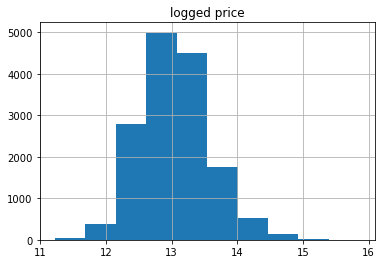

In [459]:

X_train.hist(column= 'logged price')

# Log Transformation of Feature sqft_living 
**It is also a positively skewed**

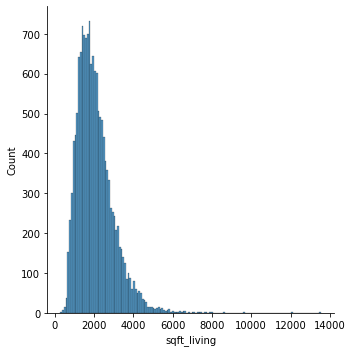

In [460]:
sns.displot(X_train['sqft_living'])

In [461]:
X_train['logged sqft_living'] = np.log(X_train.sqft_living)
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,date
1468,4,1.50,1390,7200,1.0,0,0,3,7,1140,...,1965,0,98133,47.7224,-122.332,1630,7702,12.899220,7.237059,20140529T000000
15590,3,1.50,1450,7316,1.0,0,0,3,7,1450,...,1961,0,98133,47.7725,-122.349,1440,7316,12.971540,7.279319,20150317T000000
18552,5,2.75,2860,5379,2.0,0,0,3,9,2860,...,2005,0,98052,47.7082,-122.104,2980,6018,13.487006,7.958577,20140811T000000
10535,2,1.00,1050,4125,1.0,0,0,4,7,1050,...,1909,0,98144,47.5736,-122.307,1650,4125,12.880292,6.956545,20140926T000000
1069,2,1.00,1240,57000,1.0,0,0,3,7,1240,...,1962,0,98075,47.5970,-122.059,3050,25545,13.132314,7.122867,20140710T000000


**Feature sqft_living after log transformation**

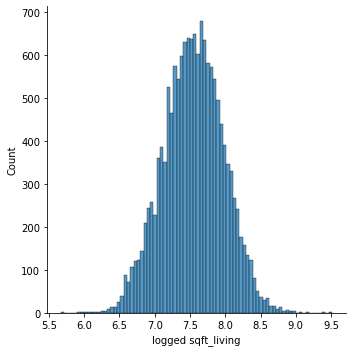

In [462]:
sns.displot(X_train['logged sqft_living'])

# Model 4
**After rescaling the coeeficient of price and sqft_living into normal distribution, thereby changing the range of data into a natural logarithm, it is time to retrain model on new logarithm transformed variables to see the improvement in accuracy of the model**

In [109]:
x_train4 = X_train[['logged sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront', 'lat', 'yr_built']]
y_train4 = X_train['logged price']

model4 = LinearRegression()
score1 = cross_val_score(model4, x_train4, y_train4, cv = 10, scoring = 'r2')
score2 = cross_val_score(model4, x_train4, y_train4, cv = 10, scoring = 'neg_root_mean_squared_error')
print('The rms value is', np.abs(score2.mean()))
print('The r square value is', score1.mean())

The rms value is 0.26124143795692883
The r square value is 0.7538844062684961


**It is clear that r squared significantly improved from  r square value 0.6866307854330157 in Model 3 to 0.7535128493075364 in Model 4 with transformed variables('logged sqft_living', 'logged price').**
**Hence performance improved after log transformation, feature engineering transformation**

# 2. Creating a New Variable
# Model 5

**=> Creating two variables from Data:- year of selling and Months of selling to see whether they can improve performance of model or not**

In [468]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,date
1468,4,1.50,1390,7200,1.0,0,0,3,7,1140,...,1965,0,98133,47.7224,-122.332,1630,7702,12.899220,7.237059,20140529T000000
15590,3,1.50,1450,7316,1.0,0,0,3,7,1450,...,1961,0,98133,47.7725,-122.349,1440,7316,12.971540,7.279319,20150317T000000
18552,5,2.75,2860,5379,2.0,0,0,3,9,2860,...,2005,0,98052,47.7082,-122.104,2980,6018,13.487006,7.958577,20140811T000000
10535,2,1.00,1050,4125,1.0,0,0,4,7,1050,...,1909,0,98144,47.5736,-122.307,1650,4125,12.880292,6.956545,20140926T000000
1069,2,1.00,1240,57000,1.0,0,0,3,7,1240,...,1962,0,98075,47.5970,-122.059,3050,25545,13.132314,7.122867,20140710T000000


In [469]:
X_train['year of selling'] = pd.DatetimeIndex(X_train['date']).year
X_train[['year of selling']]

,year of selling
1468,2014
15590,2015
18552,2014
10535,2014
1069,2014
...,...
13123,2014
19648,2014
9845,2014
10799,2014


**Training the model by adding year of selling feature**

In [470]:
x_train5 = X_train[['logged sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront', 'lat', 'yr_built', 'year of selling']]
y_train5 = X_train['logged price']

model5 = LinearRegression()
score1 = cross_val_score(model5, x_train5, y_train5, cv = 10, scoring = 'r2')
score2 = cross_val_score(model5, x_train5, y_train5, cv = 10, scoring = 'neg_root_mean_squared_error')
print('The rms value is', np.abs(score2.mean()))
print('The r square value is', score1.mean())

The rms value is 0.26039402819170143
The r square value is 0.7554552300995516


**It is clear that r 2 valued does not improved to any significant value as compared to model 4**

# Model 6
**=> Creating a new variable age of the house**

In [475]:
X_train['age'] = X_train['year of selling'] - dataset.yr_built
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,date,year of selling,age
1468,4,1.50,1390,7200,1.0,0,0,3,7,1140,...,98133,47.7224,-122.332,1630,7702,12.899220,7.237059,20140529T000000,2014,49.0
15590,3,1.50,1450,7316,1.0,0,0,3,7,1450,...,98133,47.7725,-122.349,1440,7316,12.971540,7.279319,20150317T000000,2015,54.0
18552,5,2.75,2860,5379,2.0,0,0,3,9,2860,...,98052,47.7082,-122.104,2980,6018,13.487006,7.958577,20140811T000000,2014,9.0
10535,2,1.00,1050,4125,1.0,0,0,4,7,1050,...,98144,47.5736,-122.307,1650,4125,12.880292,6.956545,20140926T000000,2014,105.0
1069,2,1.00,1240,57000,1.0,0,0,3,7,1240,...,98075,47.5970,-122.059,3050,25545,13.132314,7.122867,20140710T000000,2014,52.0


**Adding feature age to the above model**

In [472]:
x_train6 = X_train[['logged sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront', 'lat', 'yr_built', 'year of selling', 'age']]
y_train6 = X_train['logged price']

model6 = LinearRegression()
score1 = cross_val_score(model6, x_train6, y_train6, cv = 10, scoring = 'r2')
score2 = cross_val_score(model6, x_train6, y_train6, cv = 10, scoring = 'neg_root_mean_squared_error')
print('The rms value is', np.abs(score2.mean()))
print('The r square value is', score1.mean())

The rms value is 0.2606993206053413
The r square value is 0.7548897777370902


**It is again clear that r 2 valued does not improved to any significant value as compared to model 4**

# Forward Selection
# Model 7
**Selecting significant features for model training keeping in view the trade-off between accuracy and complexity**

In [121]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [125]:
x_train6 = X_train.drop(['date','logged price'], axis= 'columns') = X_train['logged price']

forward_feature_selection = sfs(model6,
                                k_features = 21,
                                  forward = True,
                                verbose = 2,
                                cv = 5).fit(x_train6, y_train6)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.2s finished

[2022-07-20 18:41:28] Features: 1/21 -- score: 0.4903801707591606[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished

[2022-07-20 18:41:29] Features: 2/21 -- score: 0.6276860732579472[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.3s finished

[2022-07-20 18:41:29] Features: 3/21 -- score: 0.7002874914897174[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

**It is clear that at features = 11 we have optimal result for accuracy and complexity trade-off** 

In [126]:
x_train6.shape

(15129, 21)

In [127]:
dataset_a =pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T
dataset_a

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.49976609732186084, 0.48432935034811975, 0.4...",0.49038,"(grade,)",0.017949,0.013965,0.006982
2,"(8, 14)","[0.6344477428531825, 0.6164335722822357, 0.621...",0.627686,"(grade, lat)",0.01884,0.014658,0.007329
3,"(2, 8, 14)","[0.709780871916907, 0.6836588057139061, 0.6977...",0.700287,"(sqft_living, grade, lat)",0.015167,0.0118,0.0059
4,"(2, 8, 14, 20)","[0.7328804160112703, 0.7118298261487801, 0.732...",0.7292,"(sqft_living, grade, lat, age)",0.014725,0.011457,0.005728
5,"(2, 6, 8, 14, 20)","[0.7443841244442038, 0.7245612918812006, 0.747...",0.742135,"(sqft_living, view, grade, lat, age)",0.015185,0.011815,0.005907
6,"(1, 2, 6, 8, 14, 20)","[0.7488413208853311, 0.7314445176909814, 0.751...",0.747348,"(bathrooms, sqft_living, view, grade, lat, age)",0.013979,0.010876,0.005438
7,"(1, 2, 6, 8, 14, 16, 20)","[0.7532088236489441, 0.737268255815322, 0.7595...",0.752951,"(bathrooms, sqft_living, view, grade, lat, sqf...",0.013971,0.01087,0.005435
8,"(1, 2, 6, 7, 8, 14, 16, 20)","[0.7572707176366638, 0.7437339034789768, 0.762...",0.757084,"(bathrooms, sqft_living, view, condition, grad...",0.013011,0.010123,0.005062
9,"(1, 2, 5, 6, 7, 8, 14, 16, 20)","[0.7601121542926719, 0.7482486947550344, 0.768...",0.761103,"(bathrooms, sqft_living, waterfront, view, con...",0.013178,0.010253,0.005126
10,"(1, 2, 4, 5, 6, 7, 8, 14, 16, 20)","[0.761865026145097, 0.7499248396383144, 0.7729...",0.764058,"(bathrooms, sqft_living, floors, waterfront, v...",0.013372,0.010404,0.005202


**At features = 11 , significant features are:-**

In [128]:
dataset_a['feature_idx'][11]

(1, 2, 4, 5, 6, 7, 8, 14, 16, 18, 20)

In [129]:
dataset_a['feature_names'][11]

('bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'lat',
 'sqft_living15',
 'logged sqft_living',
 'age')


**Adjusting these significant features into model to train it**

In [491]:
#x_train = dataset[['logged sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront', 'lat', 'yr_built', 'year of selling', 'age','condition', 'floors']]
x_train7 = X_train[['bathrooms',
 'logged sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'lat',
 'sqft_living15',
 'year of selling',
 'age']]
y_train7 = X_train['logged price']

model7 = LinearRegression()
score1 = cross_val_score(model7, x_train7, y_train7, cv = 10, scoring = 'r2')
score2 = cross_val_score(model7, x_train7, y_train7, cv = 10, scoring = 'neg_root_mean_squared_error')
print('The rms value is', np.abs(score2.mean()))
print('The r square value is', score1.mean())

The rms value is 0.2541047414554259
The r square value is 0.7671554928600293


# Result:-- 
**Linear Regression Model 7 is the best mode so far**

# Decision Tree Models

# Model 1

In [ ]:
x_train1 = X_train[['sqft_living', 'grade', 'bathrooms', 'view']]
y_train

In [148]:
x_train1.shape

(15129, 4)

In [149]:
y_train.shape

(15129,)

In [160]:
print(x_train1.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15129 entries, 1468 to 2732
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  15129 non-null  int64  
 1   grade        15129 non-null  int64  
 2   bathrooms    15129 non-null  float64
 3   view         15129 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.1 MB
None


In [208]:
 dtr = DecisionTreeRegressor()

In [209]:
dtr

DecisionTreeRegressor()

In [265]:
DTR_Model = DecisionTreeRegressor().fit(x_train1, y_train)

In [314]:
print(f'Train Accuracy - : {DTR_Model.score(x_train1,y_train):.3f}')
#print(f'Test Accuracy - : {DTR_Model1.score(x_test,y_test):.3f}')

Train Accuracy - : 0.897


**Above result clearly shows that without Hyper Parameter Tuning the model has issue of overfitting**

# Hyperparameter Tunning with GridSearchCV and RandomizedSearchCV 
**To find optimal hyperparameters to train the model**

In [214]:
dtr.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [218]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.exceptions import FitFailedWarning 
from sklearn.model_selection import GridSearchCV

In [315]:
parameters = {'max_depth' : [5,11,18,20],
              'min_samples_leaf' : [1,2,3,4,5],
              'min_samples_split' : [2,3,4,5,10,12,1],
              'max_features': ['auto','sqrt','log2'],
               'criterion' : ['squared_error', 'friedman_mse', 'absolute_error']
              } 


# Finding Best Estimators with GridSearchCV

In [259]:
best_dtr_grid = GridSearchCV(dtr, parameters, cv = 5, verbose = True)

In [260]:
best_dtr_grid.fit(x_train1, y_train)

Fitting 5 folds for each of 1260 candidates, totalling 6300 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [5, 11, 18, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 10, 12, 1]},
             verbose=True)

In [261]:
best_dtr_grid.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto', min_samples_leaf=4)

In [318]:
# Model with best estimators as per GridSearchCV
DTR_Model1GS = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto', min_samples_leaf=4)

In [319]:
DTR_Model1GS.fit(x_train1, y_train) # Training the model with hyperparameters as per GridSearchCV

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto', min_samples_leaf=4)

In [320]:
print(f'Train Accuracy - : {DTR_Model1GS.score(x_train1,y_train):.3f}')
#print(f'Test Accuracy - : {DTR_Model1.score(x_test,y_test):.3f}')

Train Accuracy - : 0.628


**Above result shows error of overfiting is reduced**

In [323]:
score1 = cross_val_score(DTR_Model1GS,x_train1, y_train, cv =10, scoring ='neg_root_mean_squared_error')
score2 = cross_val_score(DTR_Model1GS,x_train1, y_train, cv =10, scoring ='r2')

In [324]:
rmsescore= np.abs(score1).mean
r2score =score2.mean



**Gauging the performance of model**

In [325]:
print("The rmse score is", rmsescore().min())
print("The R square value is", r2score().max())

The rmse score is 235630.57153187125
The R square value is 0.5792013906114735


# Finding Best estimators with RandomSearch CV 

In [309]:
best_dtr_random = RandomizedSearchCV(dtr,  parameters, cv = 5, verbose = True)

In [310]:
best_dtr_random.fit(x_train1, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [5, 11, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              12, 1]},
                   verbose=True)

In [312]:
best_dtr_random.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [326]:
#Building model with best estimator as per RandomizedSearchCV
DTR_Model1RS = DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [327]:
DTR_Model1RS.fit(x_train1, y_train) # Training the model with hyperparameters as per RandomizedSearchCV

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [328]:
print(f'Train Accuracy - : {DTR_Model1RS.score(x_train1,y_train):.3f}')
#print(f'Test Accuracy - : {DTR_Model1RS.score(x_test,y_test):.3f}')

Train Accuracy - : 0.707


**Above result shows error of overfiting is reduced**

In [342]:
score1a = cross_val_score(DTR_Model1RS,x_train1, y_train, cv =10, scoring ='neg_root_mean_squared_error')
score2a = cross_val_score(DTR_Model1RS,x_train1, y_train, cv =10, scoring ='r2')

In [343]:
rmsescorea= np.abs(score1).mean
r2scorea =score2.mean


**Gauging the performance of the model**

In [345]:
print("The rmse score is", rmsescorea().min())
print("The R square value is", r2scorea().max())

The rmse score is 240753.5382270257
The R square value is 0.5602266082122327


***From now on we will follow RandomizedSearchCV (Train Accuracy - : 0.707) as above results shows, its Train accuracy is more than GridSearchCV(Train Accuracy - : 0.628)**

# Model 2

In [362]:
x_train2 = X_train[['sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront']]
y_train  
parameters = {'max_depth' : [5,11,18,20],
              'min_samples_leaf' : [1,2,3,4,5],
              'min_samples_split' : [2,3,4,5,10,12],
              'max_features': ['auto','sqrt','log2'],
               'criterion' : ['squared_error', 'friedman_mse', 'absolute_error']
              } 
best_dtr_random2 = RandomizedSearchCV(dtr,  parameters, cv = 5, verbose = True)
best_dtr_random2.fit(x_train2, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [5, 11, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              12]},
                   verbose=True)

In [363]:
best_dtr_random.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [364]:
DTR_Model2RS = DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [365]:
DTR_Model2RS.fit(x_train2, y_train) # Training the model with hyperparameters as per RandomizedSearchCV

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [366]:
print(f'Train Accuracy - : {DTR_Model2RS.score(x_train2,y_train):.3f}')

Train Accuracy - : 0.714


In [367]:
score1 = cross_val_score(DTR_Model2RS,x_train2, y_train, cv =10, scoring ='neg_root_mean_squared_error')
score2 = cross_val_score(DTR_Model2RS,x_train2, y_train, cv =10, scoring ='r2')
rmsescorea= np.abs(score1).mean
r2scorea =score2.mean
print("The rmse score is", rmsescorea().min())
print("The R square value is", r2scorea().max())

The rmse score is 237199.98456905285
The R square value is 0.5737929984930688


# Model 3

In [368]:
x_train3 = X_train[['sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront', 'lat', 'yr_built']]
y_train
parameters = {'max_depth' : [5,11,18,20],
              'min_samples_leaf' : [1,2,3,4,5],
              'min_samples_split' : [2,3,4,5,10,12],
              'max_features': ['auto','sqrt','log2'],
               'criterion' : ['squared_error', 'friedman_mse', 'absolute_error']
              } 
best_dtr_random3 = RandomizedSearchCV(dtr,  parameters, cv = 5, verbose = True)
best_dtr_random3.fit(x_train3, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [5, 11, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              12]},
                   verbose=True)

In [369]:
best_dtr_random.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [370]:
DTR_Model3RS = DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [371]:
DTR_Model3RS.fit(x_train3, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [372]:
print(f'Train Accuracy - : {DTR_Model3RS.score(x_train3,y_train):.3f}')

Train Accuracy - : 0.861


In [373]:
score1 = cross_val_score(DTR_Model3RS,x_train3, y_train, cv =10, scoring ='neg_root_mean_squared_error')
score2 = cross_val_score(DTR_Model3RS,x_train3, y_train, cv =10, scoring ='r2')
rmsescorea= np.abs(score1).mean
r2scorea =score2.mean
print("The rmse score is", rmsescorea().min())
print("The R square value is", r2scorea().max())

The rmse score is 187708.35982861414
The R square value is 0.732720686690209


# Model 4

In [374]:
x_train4 = X_train[['logged sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront', 'lat', 'yr_built']]
y_train4 = X_train['logged price']

parameters = {'max_depth' : [5,11,18,20],
              'min_samples_leaf' : [1,2,3,4,5],
              'min_samples_split' : [2,3,4,5,10,12],
              'max_features': ['auto','sqrt','log2'],
               'criterion' : ['squared_error', 'friedman_mse', 'absolute_error']
              } 
best_dtr_random4 = RandomizedSearchCV(dtr,  parameters, cv = 5, verbose = True)
best_dtr_random4.fit(x_train4, y_train4)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [5, 11, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              12]},
                   verbose=True)

In [375]:
best_dtr_random.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [377]:
DTR_Model4RS = DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [378]:
DTR_Model4RS.fit(x_train4, y_train4)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [380]:
print(f'Train Accuracy - : {DTR_Model4RS.score(x_train4,y_train4):.3f}')

Train Accuracy - : 0.874


In [383]:
score1 = cross_val_score(DTR_Model4RS,x_train4, y_train4, cv =10, scoring ='neg_root_mean_squared_error')
score2 = cross_val_score(DTR_Model4RS,x_train4, y_train4, cv =10, scoring ='r2')
rmsescorea= np.abs(score1).mean
r2scorea =score2.mean
print("The rmse score is", rmsescorea().min())
print("The R square value is", r2scorea().max())

The rmse score is 0.23596958646352212
The R square value is 0.7992705252865584


# Model 5

In [415]:
x_train5 = X_train[['logged sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront', 'lat', 'yr_built', 'year of selling']]
y_train5 = X_train['logged price']


parameters = {'max_depth' : [5,11,18,20],
              'min_samples_leaf' : [1,2,3,4,5],
              'min_samples_split' : [2,3,4,5,10,12],
              'max_features': ['auto','sqrt','log2'],
               'criterion' : ['squared_error', 'friedman_mse', 'absolute_error']
              } 
best_dtr_random5 = RandomizedSearchCV(dtr,  parameters, cv = 5, verbose = True)
best_dtr_random5.fit(x_train5, y_train5)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [5, 11, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              12]},
                   verbose=True)

In [416]:
best_dtr_random.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [417]:
DTR_Model5RS = DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [418]:
DTR_Model5RS.fit(x_train5, y_train5)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [419]:
print(f'Train Accuracy - : {DTR_Model5RS.score(x_train5,y_train5):.3f}')

Train Accuracy - : 0.875


In [420]:
score1 = cross_val_score(DTR_Model5RS,x_train5, y_train5, cv =10, scoring ='neg_root_mean_squared_error')
score2 = cross_val_score(DTR_Model5RS,x_train5, y_train5, cv =10, scoring ='r2')
rmsescorea= np.abs(score1).mean
r2scorea =score2.mean
print("The rmse score is", rmsescorea().min())
print("The R square value is", r2scorea().max())

The rmse score is 0.23567986701494967
The R square value is 0.7997592459833078


# Model 6

In [421]:
x_train6 = X_train[['logged sqft_living', 'bedrooms','grade', 'bathrooms', 'view', 'waterfront', 'lat', 'yr_built', 'year of selling', 'age']]
y_train6 = X_train['logged price']


parameters = {'max_depth' : [5,11,18,20],
              'min_samples_leaf' : [1,2,3,4,5],
              'min_samples_split' : [2,3,4,5,10,12],
              'max_features': ['auto','sqrt','log2'],
               'criterion' : ['squared_error', 'friedman_mse', 'absolute_error']
              } 
best_dtr_random6 = RandomizedSearchCV(dtr,  parameters, cv = 5, verbose = True)
best_dtr_random6.fit(x_train6, y_train6)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [5, 11, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              12]},
                   verbose=True)

In [422]:
best_dtr_random.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [423]:
DTR_Model6RS = DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [424]:
DTR_Model6RS.fit(x_train6, y_train6)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [425]:
print(f'Train Accuracy - : {DTR_Model6RS.score(x_train6,y_train6):.3f}')

Train Accuracy - : 0.876


In [426]:
score1 = cross_val_score(DTR_Model6RS,x_train6, y_train6, cv =10, scoring ='neg_root_mean_squared_error')
score2 = cross_val_score(DTR_Model6RS,x_train6, y_train6, cv =10, scoring ='r2')
rmsescorea= np.abs(score1).mean
r2scorea =score2.mean
print("The rmse score is", rmsescorea().min())
print("The R square value is", r2scorea().max())

The rmse score is 0.23582411858929864
The R square value is 0.7996601976898424


# Model 7

In [427]:
x_train7 = X_train[['bathrooms',
 'logged sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'lat',
 'sqft_living15',
 'year of selling',
 'age']]
y_train7 = X_train['logged price']

parameters = {'max_depth' : [5,11,18,20],
              'min_samples_leaf' : [1,2,3,4,5],
              'min_samples_split' : [2,3,4,5,10,12],
              'max_features': ['auto','sqrt','log2'],
               'criterion' : ['squared_error', 'friedman_mse', 'absolute_error']
              } 
best_dtr_random7 = RandomizedSearchCV(dtr,  parameters, cv = 5, verbose = True)
best_dtr_random7.fit(x_train7, y_train7)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [5, 11, 18, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              12]},
                   verbose=True)

In [428]:
best_dtr_random.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [429]:
DTR_Model7RS = DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [431]:
DTR_Model7RS.fit(x_train7, y_train7)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=11,
                      max_features='auto', min_samples_leaf=5)

In [434]:
print(f'Train Accuracy - : {DTR_Model7RS.score(x_train7,y_train7):.3f}')

Train Accuracy - : 0.883


In [435]:
score1 = cross_val_score(DTR_Model7RS,x_train7, y_train7, cv =10, scoring ='neg_root_mean_squared_error')
score2 = cross_val_score(DTR_Model7RS,x_train7, y_train7, cv =10, scoring ='r2')
rmsescorea= np.abs(score1).mean
r2scorea =score2.mean
print("The rmse score is", rmsescorea().min())
print("The R square value is", r2scorea().max())

The rmse score is 0.2334070723407923
The R square value is 0.8037466817203317


**It is clear from the R square value that model 7 is the best model among Decision Tree Regressor Models**

# Testing: --

**After fitting all the model, it is time to take the best performance model and evaluate their performance on the test dataset.
 (Evaluating their performance on the basis of mean absolute error (mas))**
                                                            
-  The best performance model in case of Linear Regression is Model 7
-  The best performance model in case of Decision Tree Regressor is Model 7

In [436]:
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,date
17384,2,1.50,1430,1650,3.0,0,0,3,7,1430,...,1999,0,98125,47.7222,-122.290,1430,1650,NaN,7.265430,20141029T000000
722,4,3.25,4670,51836,2.0,0,0,4,12,4670,...,1988,0,98005,47.6350,-122.164,4230,41075,NaN,8.448914,20140808T000000
2680,2,0.75,1440,3700,1.0,0,0,3,7,1200,...,1914,0,98107,47.6707,-122.364,1440,4300,NaN,7.272398,20140625T000000
18754,2,1.00,1130,2640,1.0,0,0,4,8,1130,...,1927,0,98109,47.6438,-122.357,1680,3200,NaN,7.029973,20140624T000000
14554,4,2.50,3180,9603,2.0,0,2,3,9,3180,...,2002,0,98155,47.7717,-122.277,2440,15261,NaN,8.064636,20150426T000000


# Feature Engineering on the Test Data

In [476]:
X_test['logged sqft_living'] = np.log(X_test.sqft_living)
X_test['year of selling'] = pd.DatetimeIndex(X_test['date']).year
X_test['month of selling'] = pd.DatetimeIndex(X_test['date']).month
X_test['age']= X_test['year of selling']- X_test.yr_built

In [477]:
X_test['logged price']= np.log(y_test)


In [478]:
X_test.head()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,date,year of selling,month of selling,age
17384,2,1.50,1430,1650,3.0,0,0,3,7,1430,...,47.7222,-122.290,1430,1650,12.601487,7.265430,20141029T000000,2014,10,15
722,4,3.25,4670,51836,2.0,0,0,4,12,4670,...,47.6350,-122.164,4230,41075,14.271669,8.448914,20140808T000000,2014,8,26
2680,2,0.75,1440,3700,1.0,0,0,3,7,1200,...,47.6707,-122.364,1440,4300,13.239435,7.272398,20140625T000000,2014,6,100
18754,2,1.00,1130,2640,1.0,0,0,4,8,1130,...,47.6438,-122.357,1680,3200,13.355853,7.029973,20140624T000000,2014,6,87
14554,4,2.50,3180,9603,2.0,0,2,3,9,3180,...,47.7717,-122.277,2440,15261,13.567049,8.064636,20150426T000000,2015,4,13


In [484]:
 X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zipcode,lat,long,sqft_living15,sqft_lot15,logged price,logged sqft_living,date,year of selling,age
1468,4,1.50,1390,7200,1.0,0,0,3,7,1140,...,98133,47.7224,-122.332,1630,7702,12.899220,7.237059,20140529T000000,2014,49.0
15590,3,1.50,1450,7316,1.0,0,0,3,7,1450,...,98133,47.7725,-122.349,1440,7316,12.971540,7.279319,20150317T000000,2015,54.0
18552,5,2.75,2860,5379,2.0,0,0,3,9,2860,...,98052,47.7082,-122.104,2980,6018,13.487006,7.958577,20140811T000000,2014,9.0
10535,2,1.00,1050,4125,1.0,0,0,4,7,1050,...,98144,47.5736,-122.307,1650,4125,12.880292,6.956545,20140926T000000,2014,105.0
1069,2,1.00,1240,57000,1.0,0,0,3,7,1240,...,98075,47.5970,-122.059,3050,25545,13.132314,7.122867,20140710T000000,2014,52.0


# 1. Testing with Decision Tree Model :-07

In [487]:
x_train7 = X_train[['bathrooms',
 'logged sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'lat',
 'sqft_living15',
 'year of selling',
 'age']]
y_train7 = X_train['logged price']


x_test = X_test [['bathrooms',
 'logged sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'lat',
 'sqft_living15',
 'year of selling',
 'age']]



In [488]:
DTR_Model7RS.fit(x_train7, y_train)
pre=DTR_Model7RS.predict(x_test)
pre

array([ 314908.33333333, 1396420.        ,  548554.39465875, ...,
        327225.80645161,  237307.31446541,  202364.30769231])

In [494]:
error = y_test-pre     # y_test are expected values nad pre are predicted values
mae1= np.sum(np.abs(error))
mae1= mae1/len(y_test)
mae1

97026.42704149307

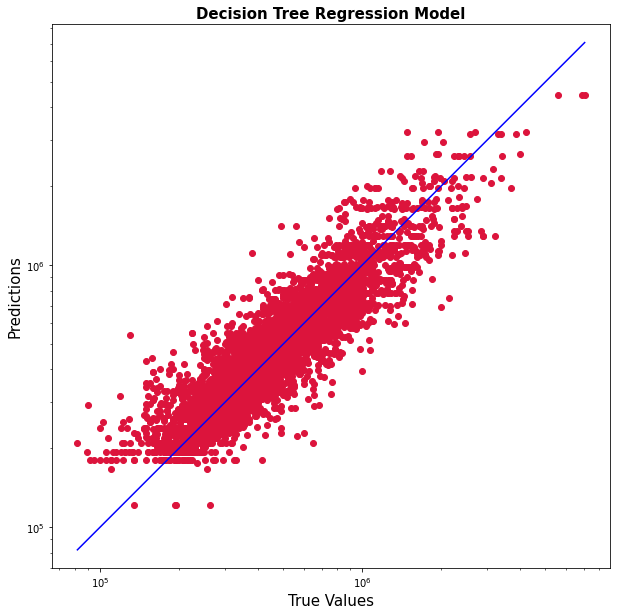

In [503]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pre, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pre), max(y_test))
p2 = min(min(pre), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Decision Tree Regression Model', fontsize=15, weight = 'bold')
plt.axis('equal')
plt.show()

# Testing with Linear Regression Model 7

In [493]:
model7.fit(x_train7, y_train) # y_test are expected values nad pre are predicted values
pre2=model7.predict(x_test)
pre2

array([ 322592.46991765, 1433353.33923529,  475517.17987944, ...,
        254468.10509928,  205967.1133523 ,  163097.14538617])

In [495]:
error2 = y_test-pre2
mae2= np.sum(np.abs(error2))
mae2= mae2/len(y_test)
mae2

128330.03958637653

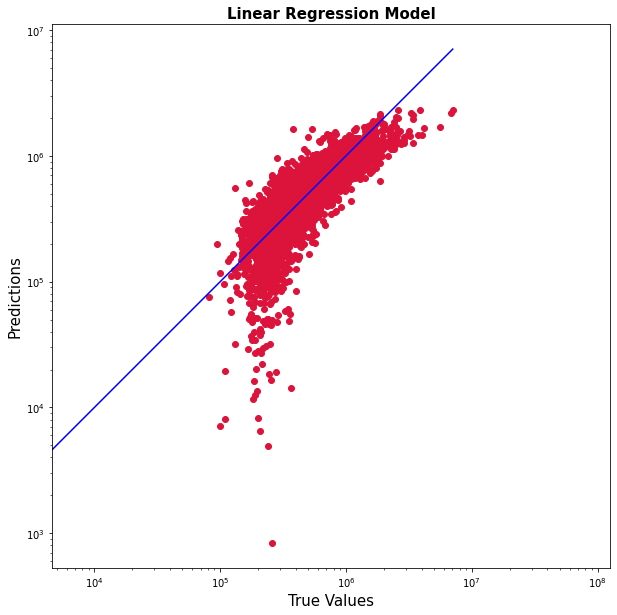

In [504]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, pre2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pre2), max(y_test))
p2 = min(min(pre2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Linear Regression Model', fontsize=15,weight = 'bold')
plt.axis('equal')
plt.show()

**Result**

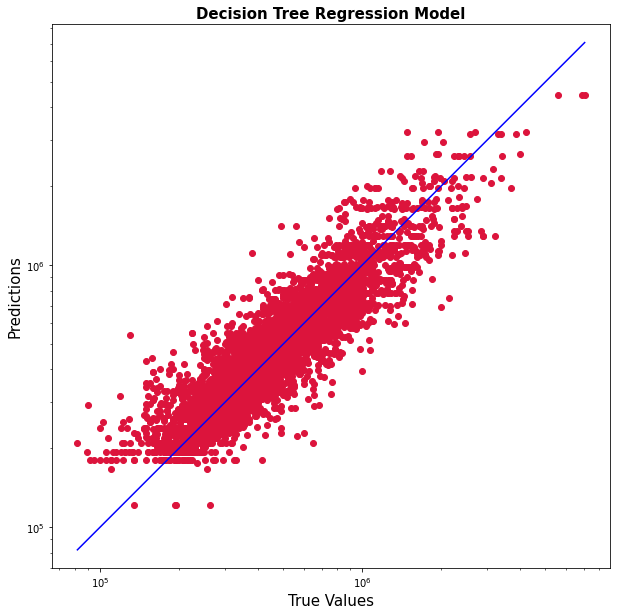

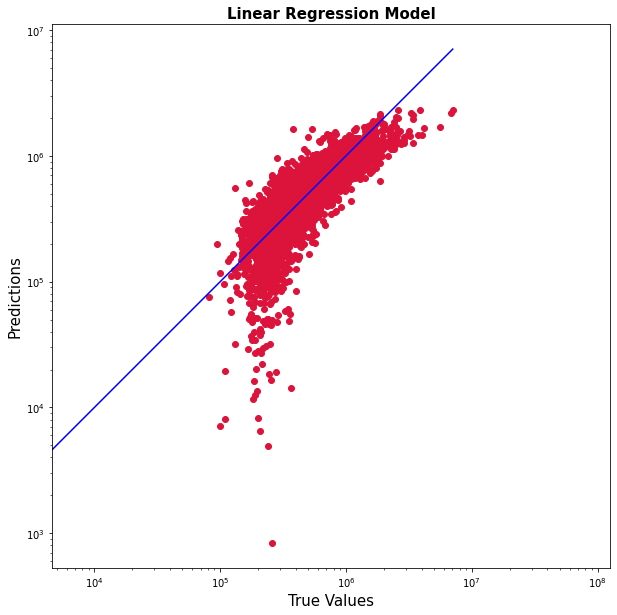

In [538]:


plt.subplot
plt.figure(figsize=(10,10))
plt.scatter(y_test, pre, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pre), max(y_test))
p2 = min(min(pre), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Decision Tree Regression Model', fontsize=15, weight = 'bold')
plt.axis('equal')
plt.show()


#-----------------------
plt.subplot
plt.figure(figsize=(10,10))
plt.scatter(y_test, pre2, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pre2), max(y_test))
p2 = min(min(pre2), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Linear Regression Model', fontsize=15,weight = 'bold')
plt.axis('equal')
plt.show()

# Conclusion
**So comparing the mean absolute error between Linear Regression Model 7 and Decision Tree Regressor model 7, it is clear that the best performing model is Decision Tree model number 7**